In [194]:
#import libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
sns.set()

In [195]:
df_train = pd.read_csv('cs-training.csv')
df_test = pd.read_csv('cs-test.csv')
df_train.drop('Unnamed: 0', axis = 1, inplace = True)
df_test.drop('Unnamed: 0', axis = 1, inplace = True)
df_test.drop('SeriousDlqin2yrs', axis = 1, inplace = True)

In [196]:
df_train.columns = ['target', 'UnsecuredLines', 'age', 'PastDue30-59days', 'DebtRatio', 'MonthlyIncome', 'OpenCredit',
                   'Late_90days', 'RealEstate','PastDue60-89days', 'Dependents']

In [197]:
df_test.columns = ['UnsecuredLines', 'age', 'PastDue30-59days', 'DebtRatio', 'MonthlyIncome', 'OpenCredit',
                   'Late_90days', 'RealEstate','PastDue60-89days', 'Dependents']

In [198]:
df_train.head()

,target,UnsecuredLines,age,PastDue30-59days,DebtRatio,MonthlyIncome,OpenCredit,Late_90days,RealEstate,PastDue60-89days,Dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [199]:
df_test.head()

,UnsecuredLines,age,PastDue30-59days,DebtRatio,MonthlyIncome,OpenCredit,Late_90days,RealEstate,PastDue60-89days,Dependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [200]:
df_train.isnull().sum()

target                  0
UnsecuredLines          0
age                     0
PastDue30-59days        0
DebtRatio               0
MonthlyIncome       29731
OpenCredit              0
Late_90days             0
RealEstate              0
PastDue60-89days        0
Dependents           3924
dtype: int64

In [201]:
df_test.isnull().sum()

UnsecuredLines          0
age                     0
PastDue30-59days        0
DebtRatio               0
MonthlyIncome       20103
OpenCredit              0
Late_90days             0
RealEstate              0
PastDue60-89days        0
Dependents           2626
dtype: int64

In [202]:
df_train['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

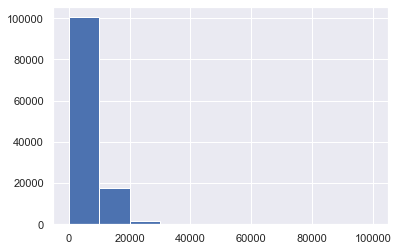

In [203]:
df_train['MonthlyIncome'].hist(bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000])

In [204]:
df_train['MonthlyIncome'].fillna(np.mean(df_train['MonthlyIncome']), inplace = True)
df_test['MonthlyIncome'].fillna(np.mean(df_train['MonthlyIncome']), inplace = True)

In [205]:
df_train['Dependents'].fillna(df_train['Dependents'].value_counts().argmax(), inplace = True)
df_test['Dependents'].fillna(df_train['Dependents'].value_counts().argmax(), inplace = True)

In [206]:
event = len(df_train[df_train['target'] == 1])/len(df_train)
event

0.06684

THE DATASET IS HIGHLY IMBALANCED AS LESS THAN 7% DEFAULTS

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

In [227]:
features = df_train.columns.tolist()
features

['target',
 'UnsecuredLines',
 'age',
 'PastDue30-59days',
 'DebtRatio',
 'MonthlyIncome',
 'OpenCredit',
 'Late_90days',
 'RealEstate',
 'PastDue60-89days',
 'Dependents']

In [228]:
target = df_train['target']

In [229]:
def transform(target):
    dico = {1: 'default', 0: 'paid'}
    return dico[target]

In [230]:
target = target.apply(lambda x : transform(x))

In [215]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features[1:]], df_train.target, random_state = 0)

In [216]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train))
X_test_scaled = scaler.transform(np.array(X_test))

In [217]:
clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(precision_score(y_test, predict))
print(recall_score(y_test, predict))
print(f1_score(y_test, predict))

0.5982905982905983
0.1923831959167648
0.29114676173499704


In [231]:
pd.Series(predict).apply(lambda x: transform(x))

0        paid
1        paid
2        paid
3        paid
4        paid
         ... 
37495    paid
37496    paid
37497    paid
37498    paid
37499    paid
Length: 37500, dtype: object